In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    featurewise_center = True,
    featurewise_std_normalization = True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.25,
    zoom_range=0.1,
    zca_whitening = True,
    channel_shift_range = 20,
    horizontal_flip = True ,
    vertical_flip = True ,
    #validation_split = 0.2
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Parkinson_ACM/0/img/train',
    target_size=(128, 128),
    batch_size=10,
    class_mode='categorical',
    shuffle=True,
    subset = 'training')

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Parkinson_ACM/0/img/test',
    target_size=(128, 128),
    batch_size=10,
    shuffle=True,
    class_mode='categorical')

#val_data = train_datagen.flow_from_directory(
 #   '/content/drive/MyDrive/img/train',
  #  target_size=(432, 288),
   # batch_size=15,
    #class_mode='categorical',
    #subset = 'validation')


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 22 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(128,128,3)))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Dense(2))
model.add(Activation("sigmoid"))

In [ ]:
opt = Adam(1e-4)

In [ ]:
opt = Adam(1e-4)
tensorboard_callback = TensorBoard(log_dir=r".\logs\tmp")
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10, verbose=1, mode='auto',
    min_delta=0.0001, cooldown=0, min_lr=0)
early_stop = early_stop = EarlyStopping(monitor='val_loss',patience=16,verbose=1)
checkpointer = ModelCheckpoint(r'models\best_model1.h5', monitor='val_accuracy', verbose=1, save_best_only=True,
                               save_weights_only=False)
callbacks = [tensorboard_callback, reduce_lr, early_stop, checkpointer]

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=opt, metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        1

In [ ]:
hist=model.fit(train_data, epochs=100,callbacks=callbacks)
#hist=cnn.fit(train_data, validation_data=val_data, epochs=50)

NameError: ignored

## Evaluation

In [ ]:
#loss_v, accuracy_v=cnn.evaluate(val_data)
loss_t, accuracy_t=model.evaluate(test_data)

#print("Validation Loss: ",loss_v)
#print("Validation Accuracy: ",accuracy_v*100,"%")

print("Test Loss: ",loss_t)
print("Test Accuracy: ",accuracy_t*100,"%")

2/2 [==============================] - 0s 30ms/step - loss: 0.6701 - accuracy: 0.6111
Test Loss:  0.6701405644416809
Test Accuracy:  61.11111044883728 %


In [ ]:
predicted_vals = model.predict_generator(test_data, steps = len(test_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
Y_pred = model.predict_generator(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
print(confusion_matrix(test_data.classes, y_pred))

[[ 0  7]
 [ 0 11]]


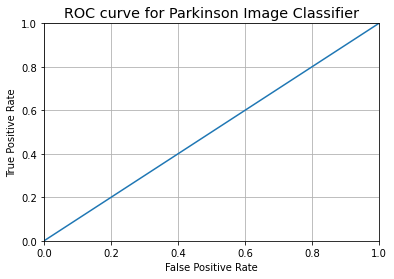

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_data.classes, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Parkinson Image Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
auc_keras

0.5

In [ ]:
print('Classification Report')
target_names = ['Parkinson','Control']
print(classification_report(test_data.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   Parkinson       0.00      0.00      0.00         7
     Control       0.61      1.00      0.76        11

    accuracy                           0.61        18
   macro avg       0.31      0.50      0.38        18
weighted avg       0.37      0.61      0.46        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
cm = confusion_matrix(y_true=test_data.classes, y_pred=y_pred)
cm_plot_labels= ['Parkinson','Control']

Confusion matrix, without normalization
[[ 0  7]
 [ 0 11]]


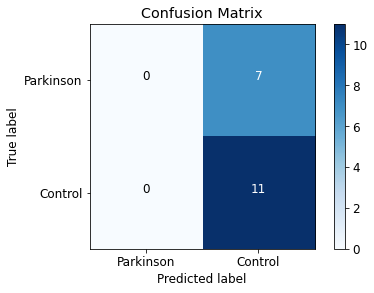

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 0  7]
 [ 0 11]]
acc: 0.6111
sensitivity: 0.0000
specificity: 1.0000
